<a href="https://colab.research.google.com/github/vegansam/AI4CCEE_Fall_2024/blob/main/in_class_activity/Lecture5/submissions/SamGood_Lecture5_09252024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Activity #1:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Car_Speed.csv')
df.dropna(inplace=True)
df.head()

,day,Time,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year
1,1,2022-07-10 00:01:00,10.0,62.0,2.0,59.0,10,2021
2,1,2022-07-10 00:02:00,5.0,63.6,4.0,58.4,10,2021
3,1,2022-07-10 00:03:00,11.0,58.2,9.0,60.0,10,2021
4,1,2022-07-10 00:04:00,19.0,60.2,17.0,61.2,10,2021
5,1,2022-07-10 00:05:00,9.0,58.2,3.0,60.8,10,2021


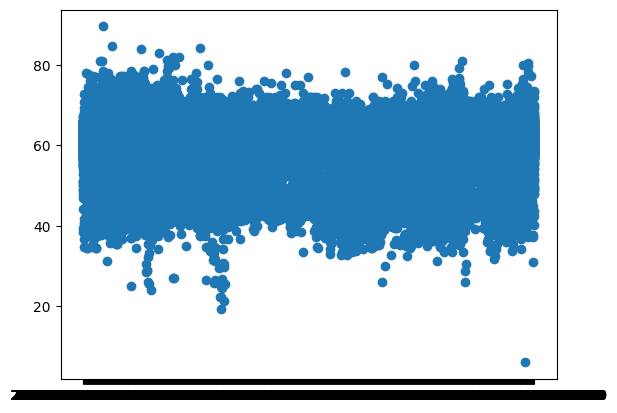

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Time'], df['WAVE-NE-Speed'])

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time_numeric'] = df['Time'].apply(lambda x: x.timestamp())

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['WAVE-NE-Speed', 'Time'], axis=1)
y = df['WAVE-NE-Speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% testing data

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 1.9551534900649785
Mean Squared Error (MSE): 8.459427283235982
R² Score: 0.3285570425459119


Activity #2:




In [ ]:
df.head()

,day,Time,WAVE-NE-Count,WAVE-NE-Speed,WAVE-SW-Count,WAVE-SW-Speed,Month,Year,Time_numeric
1,1,2022-07-10 00:01:00,10.0,62.0,2.0,59.0,10,2021,1.657411e+09
2,1,2022-07-10 00:02:00,5.0,63.6,4.0,58.4,10,2021,1.657411e+09
3,1,2022-07-10 00:03:00,11.0,58.2,9.0,60.0,10,2021,1.657411e+09
4,1,2022-07-10 00:04:00,19.0,60.2,17.0,61.2,10,2021,1.657411e+09
5,1,2022-07-10 00:05:00,9.0,58.2,3.0,60.8,10,2021,1.657412e+09


In [ ]:
from sklearn.cluster import KMeans
X_cluster = df.drop(['WAVE-NE-Speed', 'Time', 'Time_numeric'], axis=1)
kmeans = KMeans(n_clusters=3, random_state=42)  # Set the number of clusters as needed
df['Cluster'] = kmeans.fit_predict(X_cluster)

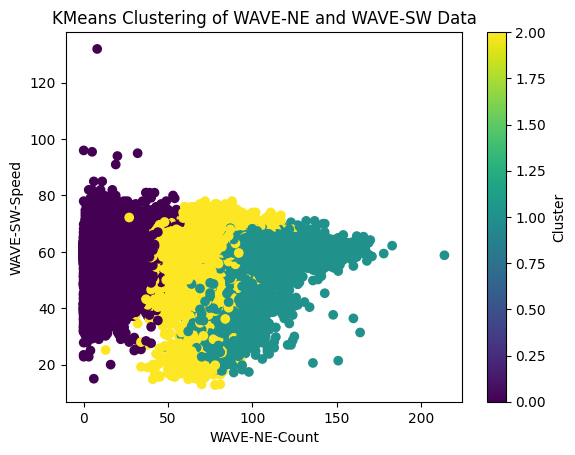

In [ ]:
plt.scatter(df['WAVE-NE-Count'], df['WAVE-SW-Speed'], c=df['Cluster'], cmap='viridis')

# Add labels and title
plt.xlabel('WAVE-NE-Count')
plt.ylabel('WAVE-SW-Speed')
plt.title('KMeans Clustering of WAVE-NE and WAVE-SW Data')

# Show the plot
plt.colorbar(label='Cluster')
plt.show()

KMeans creates clusters around centroids, which are the center points of each cluster. By looking at these centroids, you can get an idea of the "average" values of each feature in each cluster. This can give you an overall sense of what defines a typical data point in each group. Here, I can see three semi-distinct clusers (0, 1, and 2 in purple, yellow, and turquoise respectively).

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=50)
df['Cluster'] = dbscan.fit_predict(X_cluster)

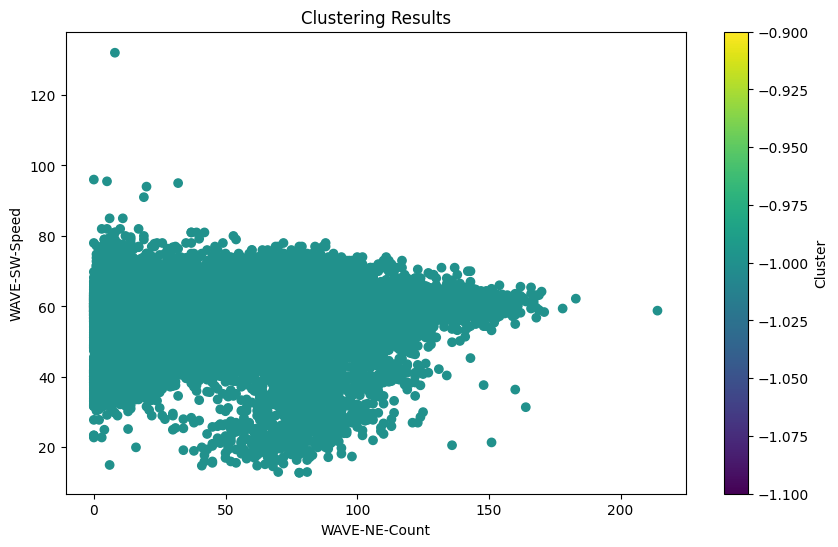

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['WAVE-NE-Count'], df['WAVE-SW-Speed'], c=df['Cluster'], cmap='viridis')
plt.xlabel('WAVE-NE-Count')
plt.ylabel('WAVE-SW-Speed')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
df['Cluster'] = hierarchical.fit_predict(X_cluster)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['WAVE-NE-Count'], df['WAVE-SW-Speed'], c=df['Cluster'], cmap='viridis')
plt.xlabel('WAVE-NE-Count')
plt.ylabel('WAVE-SW-Speed')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
df['Cluster'] = mean_shift.fit_predict(X_cluster)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['WAVE-NE-Count'], df['WAVE-SW-Speed'], c=df['Cluster'], cmap='viridis')
plt.xlabel('WAVE-NE-Count')
plt.ylabel('WAVE-SW-Speed')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)  # Set number of components (clusters)
df['Cluster'] = gmm.fit_predict(X_cluster)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['WAVE-NE-Count'], df['WAVE-SW-Speed'], c=df['Cluster'], cmap='viridis')
plt.xlabel('WAVE-NE-Count')
plt.ylabel('WAVE-SW-Speed')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=5)
df['Cluster'] = optics.fit_predict(X_cluster)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['WAVE-NE-Count'], df['WAVE-SW-Speed'], c=df['Cluster'], cmap='viridis')
plt.xlabel('WAVE-NE-Count')
plt.ylabel('WAVE-SW-Speed')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=3)  # Can specify n_clusters or leave it to detect automatically
df['Cluster'] = birch.fit_predict(X_cluster)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['WAVE-NE-Count'], df['WAVE-SW-Speed'], c=df['Cluster'], cmap='viridis')
plt.xlabel('WAVE-NE-Count')
plt.ylabel('WAVE-SW-Speed')
plt.title('Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

DBSCAN is particularly useful for noisy data and arbitrary-shaped clusters, while KMeans is great for large, clean datasets with spherical clusters. Hierarchical clustering is useful for exploring the clustering structure but tends to struggle with scalability and noise.

Activity #3:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df2 = pd.read_excel('/content/drive/My Drive/Ames_August_Crashes.xls',skiprows=5, header=0)
df2.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,DOT Case #,Unnamed: 2,Agency Case #,Unnamed: 4,City,County,Severity,Literal Description
0,08/01/2024,20241436054,NaN,24002750,NaN,Ames,Story,Property Damage Only,US 69 S ...
1,08/01/2024,20241435378,NaN,24002751,NaN,Ames,Story,Suspected Serious Injury Crash,VALLEY VIEW RD AND HARRISON RD ...
2,08/02/2024,20241435839,NaN,24002760,NaN,Ames,Story,Possible/Unknown Injury Crash,24TH ST ...
3,08/02/2024,20241436408,NaN,24002762,NaN,Ames,Story,Property Damage Only,ONTARIO ST ...
4,08/04/2024,20241435605,NaN,24002790,NaN,Ames,Story,Property Damage Only,SE 16TH ST ...


In [ ]:
df2.info()

In [ ]:
df2 = df2.drop(columns=['Unnamed: 2', 'Unnamed: 4'])
df2.dropna()
df2.head()

,Date,DOT Case #,Agency Case #,City,County,Severity,Literal Description
0,08/01/2024,20241436054,24002750,Ames,Story,Property Damage Only,US 69 S ...
1,08/01/2024,20241435378,24002751,Ames,Story,Suspected Serious Injury Crash,VALLEY VIEW RD AND HARRISON RD ...
2,08/02/2024,20241435839,24002760,Ames,Story,Possible/Unknown Injury Crash,24TH ST ...
3,08/02/2024,20241436408,24002762,Ames,Story,Property Damage Only,ONTARIO ST ...
4,08/04/2024,20241435605,24002790,Ames,Story,Property Damage Only,SE 16TH ST ...


In [ ]:
df2.describe()

,DOT Case #
count,5.100000e+01
mean,2.024144e+10
std,1.471415e+03
min,2.024144e+10
25%,2.024144e+10
50%,2.024144e+10
75%,2.024144e+10
max,2.024144e+10


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Preprocess the data (OneHotEncoding for categorical variables)
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df2[['City', 'County']]).toarray()

# Convert Date to ordinal
df2['Date_ordinal'] = pd.to_datetime(df2['Date']).apply(lambda x: x.toordinal())

# Combine the encoded data with Date_ordinal
X_encoded_df = pd.DataFrame(X_encoded)
X_encoded_df['Date_ordinal'] = df2['Date_ordinal']

# Ensure all column names are strings
X_encoded_df.columns = X_encoded_df.columns.astype(str)

# Define target variable and split data
y = df2['Severity'].factorize()[0]  # Converts Severity to numerical values
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)




In [ ]:
# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", report)

Accuracy:  0.45454545454545453
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1

    accuracy                           0.45        11
   macro avg       0.19      0.24      0.21        11
weighted avg       0.35      0.45      0.40        11



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
